## Dependencies

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

## Load and check Data

In [2]:
#Read in csv as dataframe
df = pd.read_csv("Resources/star_classification.csv")
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [3]:
#(Rows, Columns)
df.shape

(100000, 18)

In [4]:
# Amount of Non-nulls and dtypes per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
#Column names
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [6]:
#Basic stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


In [7]:
#Check for missing values
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [8]:
#Amount of unique entries per column
df.nunique( )

obj_ID          78053
alpha           99999
delta           99999
u               93748
g               92651
r               91901
i               92019
z               92007
run_ID            430
rerun_ID            1
cam_col             6
field_ID          856
spec_obj_ID    100000
class               3
redshift        99295
plate            6284
MJD              2180
fiber_ID         1000
dtype: int64

In [9]:
#Check for duplicate data
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID


In [10]:
#Covariance
df.cov( )

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
obj_ID,7.120929e+25,-1.118499e+13,-4.993681e+13,4.104389e+12,4.209231e+12,2.408626e+12,2.190548e+12,3.697865e+12,1.657978e+16,0.0,-6.293507e+11,3.960622e+13,6.716847e+30,4.032653e+11,5.965720e+15,4.008871e+15,1.544743e+14
alpha,-1.118499e+13,9.312682e+03,2.629241e+02,-4.695842e+00,-7.422666e+00,-3.952593e+00,-4.000132e+00,-8.933732e+00,-2.604547e+03,0.0,2.998821e+00,-2.380979e+03,-8.190697e+17,1.175579e-01,-7.276757e+02,3.480548e+03,8.010969e+02
delta,-4.993681e+13,2.629241e+02,3.859129e+02,1.294097e+00,2.197617e+00,-2.490271e-01,-1.547185e-01,2.262319e+00,-1.162694e+04,0.0,1.015189e+00,-5.076369e+02,7.334983e+18,4.541536e-01,6.514736e+03,3.813226e+03,1.512254e+02
u,4.104389e+12,-4.695842e+00,1.294097e+00,1.009288e+03,1.007989e+03,3.190689e+00,2.553903e+00,1.006058e+03,9.556058e+02,0.0,1.788911e-01,-3.964403e+01,3.167703e+18,3.321681e-01,2.813451e+03,1.838362e+03,1.411519e+02
g,4.209231e+12,-7.422666e+00,2.197617e+00,1.007989e+03,1.008081e+03,3.673939e+00,3.140701e+00,1.006533e+03,9.800164e+02,0.0,1.767692e-01,-4.188022e+01,4.162803e+18,5.325377e-01,3.697275e+03,2.312548e+03,1.511469e+02
r,2.408626e+12,-3.952593e+00,-2.490271e-01,3.190689e+00,3.673939e+00,3.440134e+00,3.139404e+00,3.158788e+00,5.607988e+02,0.0,2.495887e-02,-7.302882e+00,4.039749e+18,5.871653e-01,3.587990e+03,2.251342e+03,1.127620e+02
i,2.190548e+12,-4.000132e+00,-1.547185e-01,2.553903e+00,3.140701e+00,3.139404e+00,3.090194e+00,3.123057e+00,5.100242e+02,0.0,2.124163e-02,-6.988373e+00,3.866149e+18,6.324697e-01,3.433805e+03,2.138034e+03,1.028882e+02
z,3.697865e+12,-8.933732e+00,2.262319e+00,1.006058e+03,1.006533e+03,3.158788e+00,3.123057e+00,1.006676e+03,8.609558e+02,0.0,1.694101e-01,-4.209063e+01,3.987927e+18,7.043310e-01,3.541960e+03,2.149987e+03,1.268219e+02
run_ID,1.657978e+16,-2.604547e+03,-1.162694e+04,9.556058e+02,9.800164e+02,5.607988e+02,5.100242e+02,8.609558e+02,3.860300e+06,0.0,-1.468469e+02,9.221667e+03,1.563890e+21,9.389253e+01,1.389004e+06,9.333908e+05,3.595979e+04
rerun_ID,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [11]:
#Correlation
corr = df.corr()
corr

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
obj_ID,1.000000,-0.013735,-0.301237,0.015310,0.015710,0.153891,0.147670,0.013811,1.000000,NaN,-0.046997,0.031498,0.239461,0.065400,0.239460,0.262687,0.067178
alpha,-0.013735,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.013737,NaN,0.019582,-0.165577,-0.002553,0.001667,-0.002554,0.019943,0.030464
delta,-0.301237,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,-0.301238,NaN,0.032565,-0.173416,0.112329,0.031638,0.112329,0.107333,0.028250
u,0.015310,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.015309,NaN,0.003548,-0.008374,0.029997,0.014309,0.029997,0.031997,0.016305
g,0.015710,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.015710,NaN,0.003508,-0.008852,0.039443,0.022954,0.039443,0.040274,0.017470
r,0.153891,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.153889,NaN,0.008480,-0.026423,0.655245,0.433241,0.655243,0.671180,0.223106
i,0.147670,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.147668,NaN,0.007615,-0.026679,0.661641,0.492383,0.661640,0.672523,0.214787
z,0.013811,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.013811,NaN,0.003365,-0.008903,0.037813,0.030380,0.037813,0.037469,0.014668
run_ID,1.000000,-0.013737,-0.301238,0.015309,0.015710,0.153889,0.147668,0.013811,1.000000,NaN,-0.047098,0.031498,0.239460,0.065400,0.239459,0.262687,0.067165
rerun_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#peraons correlation coefficient
pearsoncorr = df.corr(method="pearson")
pearsoncorr

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
obj_ID,1.000000,-0.013735,-0.301237,0.015310,0.015710,0.153891,0.147670,0.013811,1.000000,NaN,-0.046997,0.031498,0.239461,0.065400,0.239460,0.262687,0.067178
alpha,-0.013735,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.013737,NaN,0.019582,-0.165577,-0.002553,0.001667,-0.002554,0.019943,0.030464
delta,-0.301237,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,-0.301238,NaN,0.032565,-0.173416,0.112329,0.031638,0.112329,0.107333,0.028250
u,0.015310,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.015309,NaN,0.003548,-0.008374,0.029997,0.014309,0.029997,0.031997,0.016305
g,0.015710,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.015710,NaN,0.003508,-0.008852,0.039443,0.022954,0.039443,0.040274,0.017470
r,0.153891,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.153889,NaN,0.008480,-0.026423,0.655245,0.433241,0.655243,0.671180,0.223106
i,0.147670,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.147668,NaN,0.007615,-0.026679,0.661641,0.492383,0.661640,0.672523,0.214787
z,0.013811,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.013811,NaN,0.003365,-0.008903,0.037813,0.030380,0.037813,0.037469,0.014668
run_ID,1.000000,-0.013737,-0.301238,0.015309,0.015710,0.153889,0.147668,0.013811,1.000000,NaN,-0.047098,0.031498,0.239460,0.065400,0.239459,0.262687,0.067165
rerun_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Analysis on stars
df_star = df.loc[(df['class'] == 'STAR')]
df_star.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232
12,1.237681e+18,345.801874,32.672868,23.17274,20.14496,19.41948,19.22034,18.89359,8157,301,2,38,7.323011e+18,STAR,0.000072,6504,56540,574
16,1.237679e+18,353.201522,3.080796,24.54890,21.44267,20.95315,20.79360,20.48442,7712,301,5,284,4.822278e+18,STAR,-0.000429,4283,55864,178
18,1.237679e+18,14.383135,3.214326,21.82154,20.55730,19.94918,19.76057,19.55514,7712,301,5,425,9.855073e+18,STAR,-0.000440,8753,57373,258
21,1.237658e+18,144.785293,46.826496,24.54793,22.33601,20.92259,19.87177,19.16934,2821,301,2,28,8.237292e+18,STAR,-0.000120,7316,56710,756


In [14]:
#count number of star datasets
df_star.count()

obj_ID         21594
alpha          21594
delta          21594
u              21594
g              21594
r              21594
i              21594
z              21594
run_ID         21594
rerun_ID       21594
cam_col        21594
field_ID       21594
spec_obj_ID    21594
class          21594
redshift       21594
plate          21594
MJD            21594
fiber_ID       21594
dtype: int64

In [15]:
#Analysis on Galaxies
df_galaxy= df.loc[(df['class'] == 'GALAXY')]
df_galaxy.sample(n=5)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
20048,1.237658e+18,131.252165,3.355626,18.22904,16.95616,16.40289,16.06960,15.87170,2986,301,1,84,6.351219e+17,GALAXY,0.062824,564,52224,416
49819,1.237652e+18,244.488564,51.914973,23.51937,21.71233,20.60373,19.57353,19.03956,1412,301,5,383,7.111432e+18,GALAXY,0.574796,6316,56483,903
51676,1.237680e+18,357.624336,26.939643,22.05530,23.95702,22.10164,20.48243,19.69736,8103,301,3,81,8.666128e+18,GALAXY,0.790691,7697,57574,277
82718,1.237661e+18,185.587488,49.249617,25.96601,21.58445,19.87959,19.11640,18.65096,3650,301,2,11,7.511100e+18,GALAXY,0.451434,6671,56388,805
27133,1.237654e+18,144.305571,56.735609,20.35009,18.53761,17.77701,17.32128,17.01258,2074,301,6,166,6.261079e+17,GALAXY,0.113170,556,51991,391


In [16]:
#Count number of galaxies
df_galaxy.count()

obj_ID         59445
alpha          59445
delta          59445
u              59445
g              59445
r              59445
i              59445
z              59445
run_ID         59445
rerun_ID       59445
cam_col        59445
field_ID       59445
spec_obj_ID    59445
class          59445
redshift       59445
plate          59445
MJD            59445
fiber_ID       59445
dtype: int64

In [17]:
#Analysis of quasars
df_quasar = df.loc[(df['class'] == 'QSO')]
df_quasar.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
17,1.237679e+18,1.494389,3.291746,20.38562,20.40514,20.29996,20.05918,19.89044,7712,301,5,339,9.843824e+18,QSO,2.031528,8743,57663,295
23,1.237658e+18,145.883006,47.300484,21.73992,21.53095,21.26763,21.36257,21.15861,2821,301,2,33,8.228240e+18,QSO,2.075680,7308,56709,596
33,1.237679e+18,20.052556,11.497881,21.89214,21.35124,21.18755,20.84300,20.76580,7773,301,2,441,1.246830e+19,QSO,1.528308,11074,58488,306


In [18]:
#Count number of quasars
df_quasar.count()

obj_ID         18961
alpha          18961
delta          18961
u              18961
g              18961
r              18961
i              18961
z              18961
run_ID         18961
rerun_ID       18961
cam_col        18961
field_ID       18961
spec_obj_ID    18961
class          18961
redshift       18961
plate          18961
MJD            18961
fiber_ID       18961
dtype: int64

## Data Visualizations:

<AxesSubplot:>

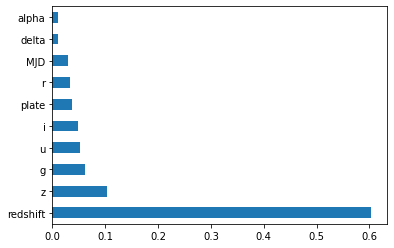

In [25]:
# Determine feature importance

from sklearn.ensemble import RandomForestClassifier    
    
X = df[['obj_ID', 'alpha', 'delta', 'u', 'g','i','r', 'z', 'plate', 'MJD', 'fiber_ID', 'redshift', 'class']].dropna()
y = X.pop('class')

model = RandomForestClassifier()
model.fit(X, y)

(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh'))

/Users/jane.mathew/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


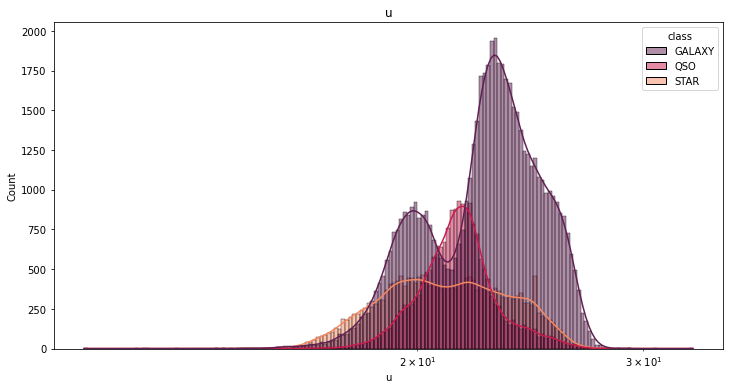

/Users/jane.mathew/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


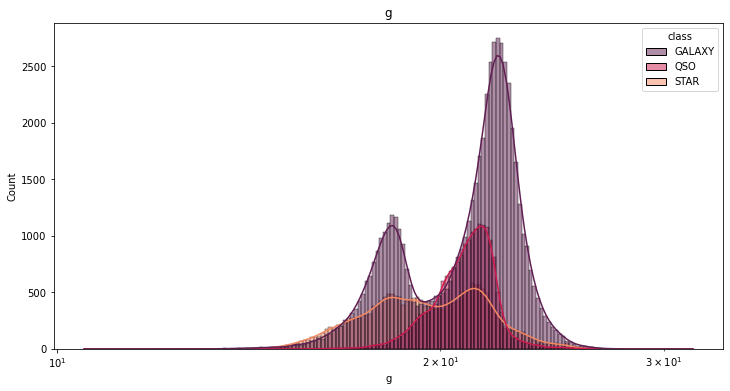

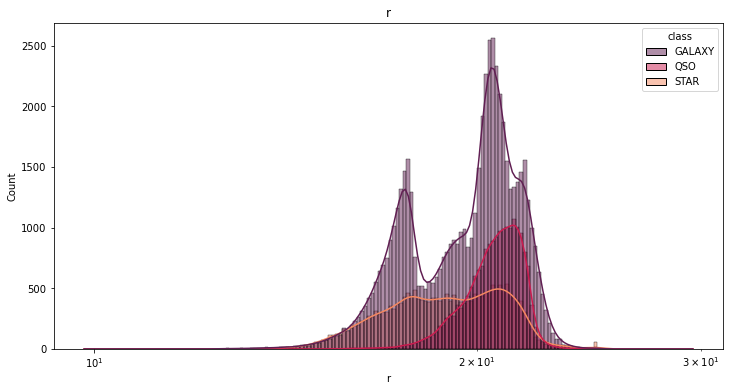

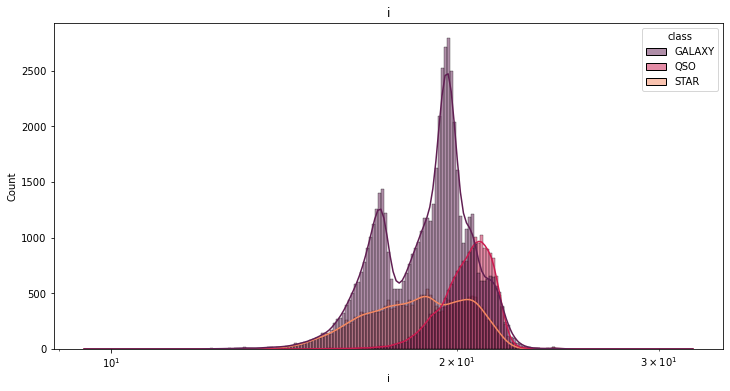

/Users/jane.mathew/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


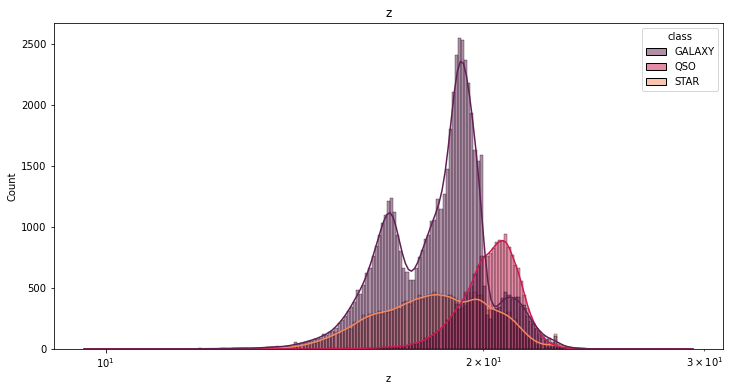

In [20]:
# plot histogram and scale for u,g,r,i,z.
for column in ['u', 'g', 'r', 'i', 'z']:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df, x=column, kde=True, hue='class', palette="rocket",log_scale=True)
    plt.title(column)
    plt.show()

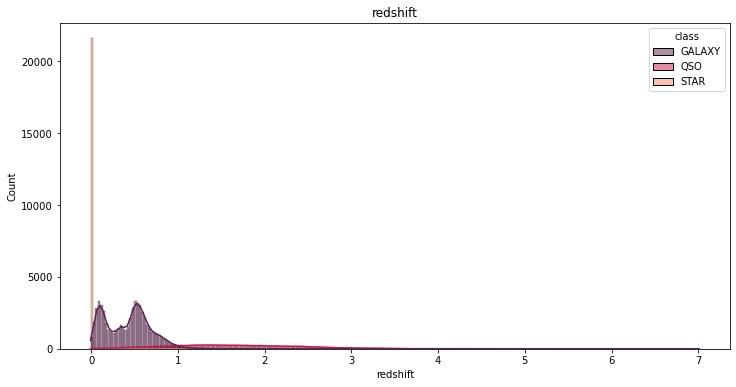

In [21]:
# plot histogram
for column in ['redshift']:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df, x=column, kde=True, hue='class', palette="rocket")
    plt.title(column)
    plt.show()

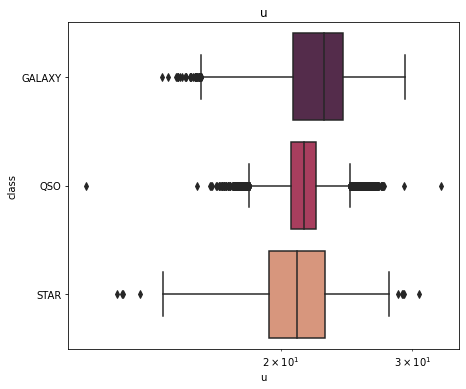

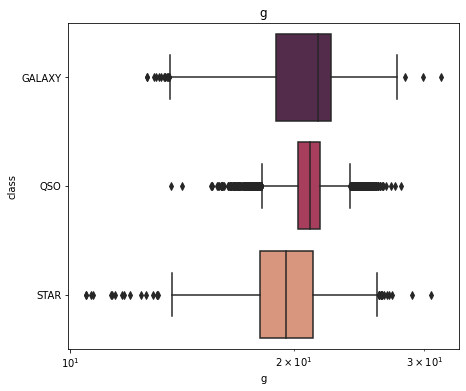

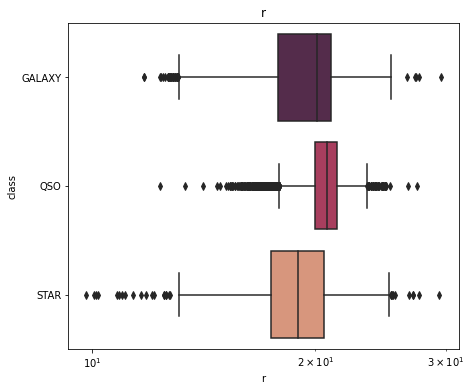

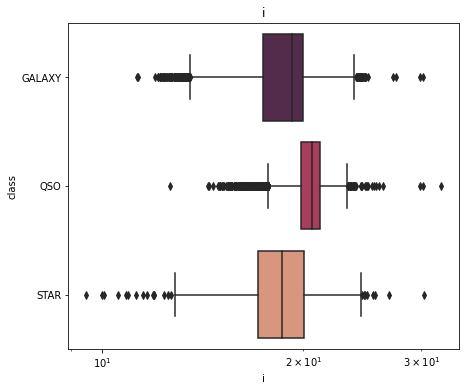

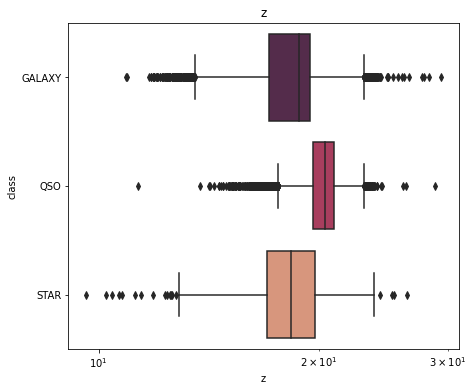

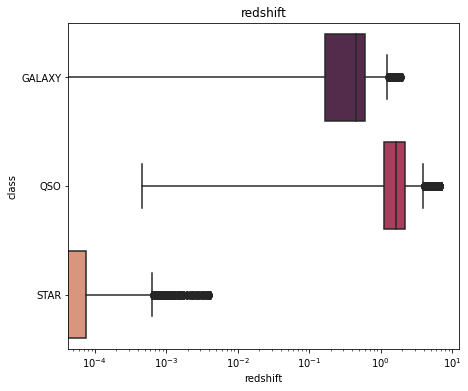

In [22]:
# plot box and whisker charts
for column in ['u', 'g', 'r', 'i', 'z', 'redshift']:
    f, ax = plt.subplots(figsize=(7, 6))
    ax.set_xscale("log")
    sns.boxplot(data=df, x=column, y='class', palette="rocket", linewidth=1.5, saturation=0.6)
    plt.title(column)
    plt.show()


<AxesSubplot:>

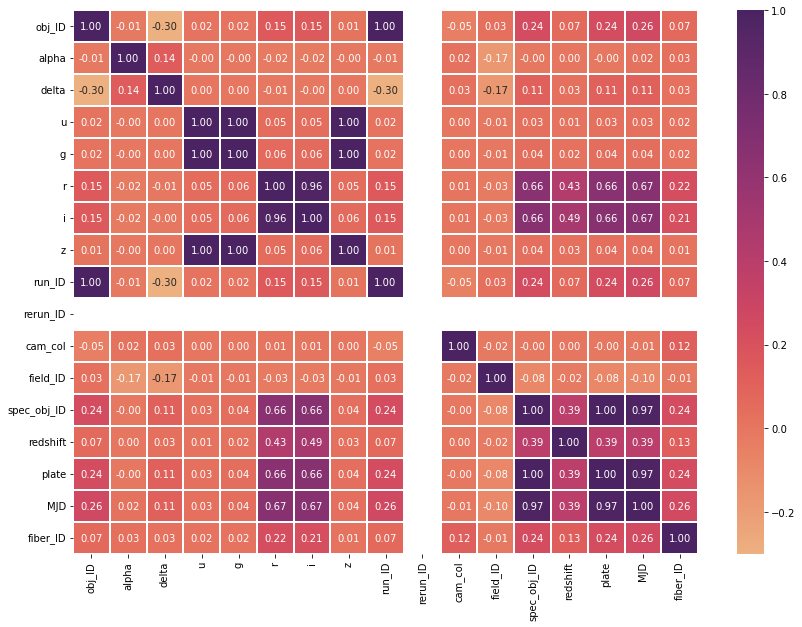

In [23]:
#heatmap
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(pearsoncorr,
           xticklabels=pearsoncorr.columns,
           yticklabels=pearsoncorr.columns,cmap="flare",annot=True,linewidth=1.5,fmt ='.2f')

## Observations and Conclusions:

- EDA observations and conclusions:

    - There are 100,000 rows of data with 18 columns.
    - The spec_obj_id is the unique identifier for each row of data.
    - There are 59,445 rows of data for galaxies, 21594 rows for stars and 18961 rows for quuasars.
    - There is a positive correlation between 'u','g','r','i','z', and 'redshift values which indiacates they move in       the same direction.
    - 'u' and 'g' have a strong positive correlation
    - 'u' and 'z' have a strong positive correlation
    - 'g' and 'z' have a strong positive correlation
    - 'i' ans 'r'have a strong positive correlation

- Visualization observations and conclusions:
    
    From the feature importance graph we can see that the top 10 important features are:
        1.) Redshift
        2.)'z'
        3.)'g'
        4.)'u'
        5.)'i'
        6.)'plate'
        7.)'r'
        8.)'MJD'
        9.)'delta'
        10.)'alpha'
        
    - Columns 'obj_ID', 'alpha', 'delta', 'run_ID','rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID','plate', 'MJD' and       'fiber_ID' are related to the image computing process and can be dropped as it has no spectral characteristic         data, this further confirmed by the feature importance graph.

    - Histograms:
    Used a logscale to scale the data for 'u','g','r','i' and 'z' characteristics.
    
    Galaxies:
        - u: distribution is biomodial 
        - g: distribution is biomodial
        - r: distribution is biomodial
        - i: distribution is biomodial
        - z: distribution is biomodial
        
    Stars:
        - u: distribution is close to uniform
        - g: distribution is close to uniform
        - r: distribution is close to uniform
        - i: distribution is close to uniform
        - z: distribution is close to uniform
       
    Quasars:
        - u: distribution has no skew, normal distribution
        - g: distribution has no skew, normal distribution
        - r: distribution has no skew, normal distribution
        - i: distribution has no skew, normal distribution
        - z: distribution has no skew, normal distribution
      
    - Box Plot graphs:
      There are outliers for each spectral characteristic of data, we are assuming that this due to the size of the         dataset and is a natural variation of the data. There is no justifiable cause to remove any of the outliers.
      
      From the box plots we can see that the redshifts medians for each stellar object is very distinct.
      "Astronomers also use redshift to measure approximate distances to very distant galaxies. The more distant an         object, the more it will be redshifted."
      Cited:"RedShift".LasCumbresObservatory,https://lco.global/spacebook/light/redshift/


## Questions:

- Which spectral characteristic in the photometric system is best for categorizing  Stars/Galaxies/Quasars?
Based on the EDA it looks like redshift plays a big part in the classification, the distributions for u,g,r,i,z are also unique for each stellar object.